In [1]:
from brian2 import *

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [2]:
taupre = taupost = 10*ms
Apre = 0.01
Apost = -Apre*taupre/taupost*1.05
tmax = 50*ms
N = 50

In [3]:
pre     = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
post    = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=100*ms)
pre.tspike = 'i*tmax/(N-1)'
post.tspike = '(N-1-i)*tmax/(N-1)'

In [4]:
S = Synapses(pre, post,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(j='i')

In [5]:
run(tmax+1*ms)

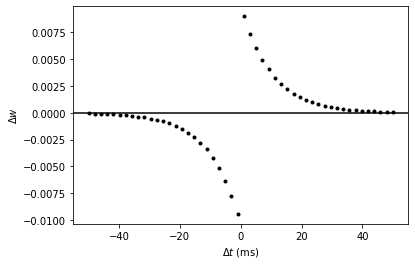

In [6]:
plot((post.tspike-pre.tspike)/ms, S.w, '.k')
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k')
show()